In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

In [2]:
def function(w):
    x = w[0]
    y = w[1]
    return x**2 + y**4

def grad_function(w):
    x = w[0]
    y = w[1]
    g = np.zeros_like(w)
    g[0] = 2*x 
    g[1] = 4*y**3
    return g

# Numerical gradient dùng để kiểm tra đạo hàm hàm nhiều biến có đúng hay không
def numerical_grad_function(w, function):
    eps = 1e-6
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_pos = w.copy()
        w_neg = w.copy()
        w_pos[i] += eps
        w_neg[i] -= eps
        g[i] = (function(w_pos)-function(w_neg))/(2*eps)
    return g

def check_grad(w, function, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    gradient = grad_function(w)
    numerical_gradient = numerical_grad_function(w, function)
    if np.linalg.norm(gradient-numerical_gradient) < 1e-4:
        return True
    else:
        return False

w = np.random.randn(2, 1)
print( 'Checking gradient: ', check_grad(w, function, grad_function))


Checking gradient:  True


In [3]:
# 4a
def gradient_descent(learning_rate, w0, N, eps):
    w = [w0]
    i = 0
    for i in range(N):
        w_new = w[-1] - learning_rate*grad_function(w[-1])
        if np.linalg.norm(grad_function(w_new)) < eps:
            print("Found minimum.")
            break
        w.append(w_new)
        #print('iter %d: ' % i, w[-1].T)
    else: print("Accelerated gradient descent did not converge after", N, "iterations.")
    return (w, i)

learning_rate = 0.1
w0 = np.array([1, 0])
N = 10000
eps = 1e-5

(w1, iter) = gradient_descent(learning_rate, w0, N, eps)

print(f'Nghiệm = {w1[-1].T}, g(x,y) = {function(w1[-1])}, hội tụ sau {iter} vòng lặp')



Found minimum.
Nghiệm = [5.84600655e-06 0.00000000e+00], g(x,y) = 3.417579257473458e-11, hội tụ sau 54 vòng lặp


Text(0.5, 1.0, '$g(x,y) = x^2 + y^4$')

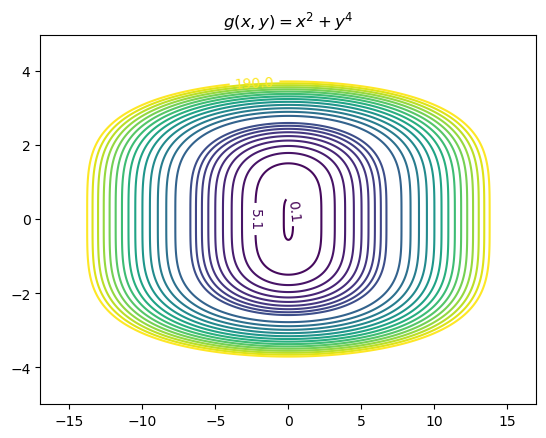

In [4]:
delta = 0.025
x = np.arange(-17.0, 17.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**4

plt.figure()
CS = plt.contour(X, Y, Z, np.concatenate((np.arange(0.1, 50, 5), np.arange(60, 200, 10))))
manual_locations = [(-4, 15), (-2, 0), ( 1, .25)]
plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
plt.title('$g(x,y) = x^2 + y^4$')


In [5]:
# 4b
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

w0 = np.array([[-2], [0]])
def save_gif_4b(eta):
    (w, it) = gradient_descent(learning_rate = eta, w0 = w0, N = 100, eps = 1e-5)
    print(it)
    fig, ax = plt.subplots(figsize=(10,10))    
    plt.cla()
    plt.axis([-6, 5, -20, 15])
    x0 = np.linspace(0, 1, 2, endpoint=True)

    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(X, Y, Z, np.concatenate((np.arange(0.1, 50, 5), np.arange(60, 200, 10))))
            manual_locations = [(-4, 15), (-2, 0), ( 1, .25)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro') 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.5f' % np.linalg.norm(grad_function(w[ii]))
        plt.title(f'$g(x, y) = x^2 + y^4$ with w0 = {w0.T}, N = 100')
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img4b_' + str(eta) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
99


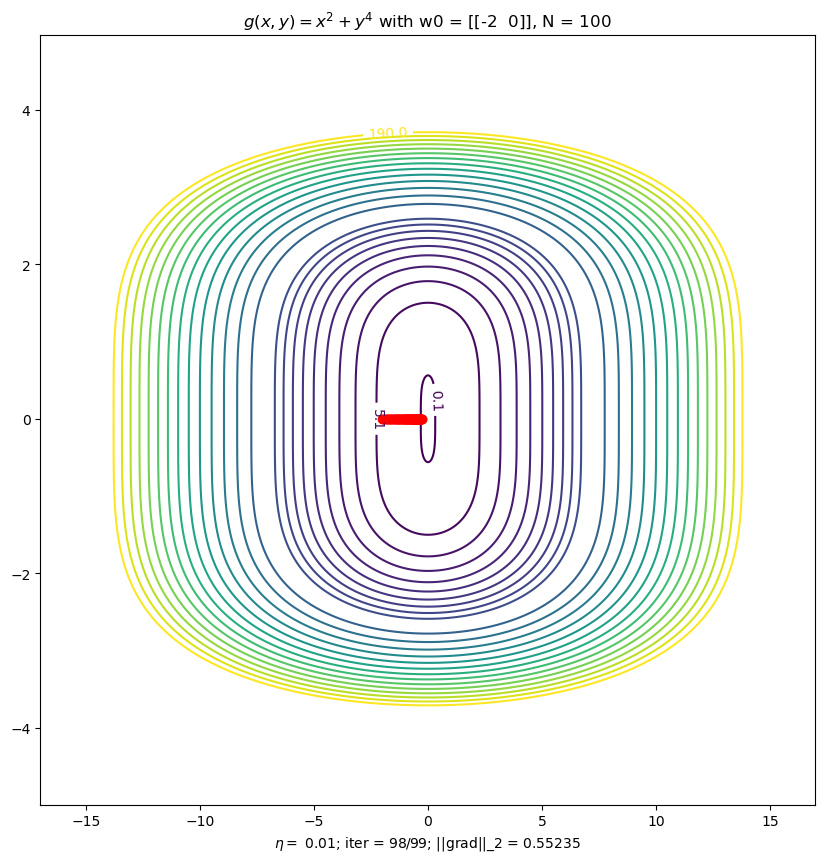

In [6]:
save_gif_4b(.01)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
99


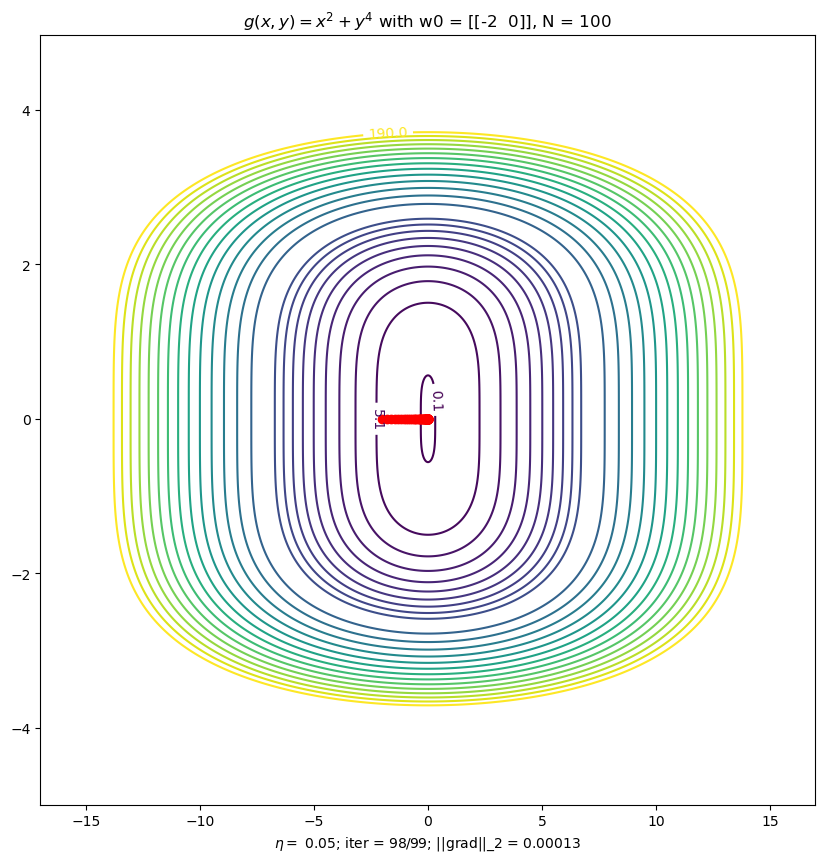

In [7]:
save_gif_4b(.05)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
57


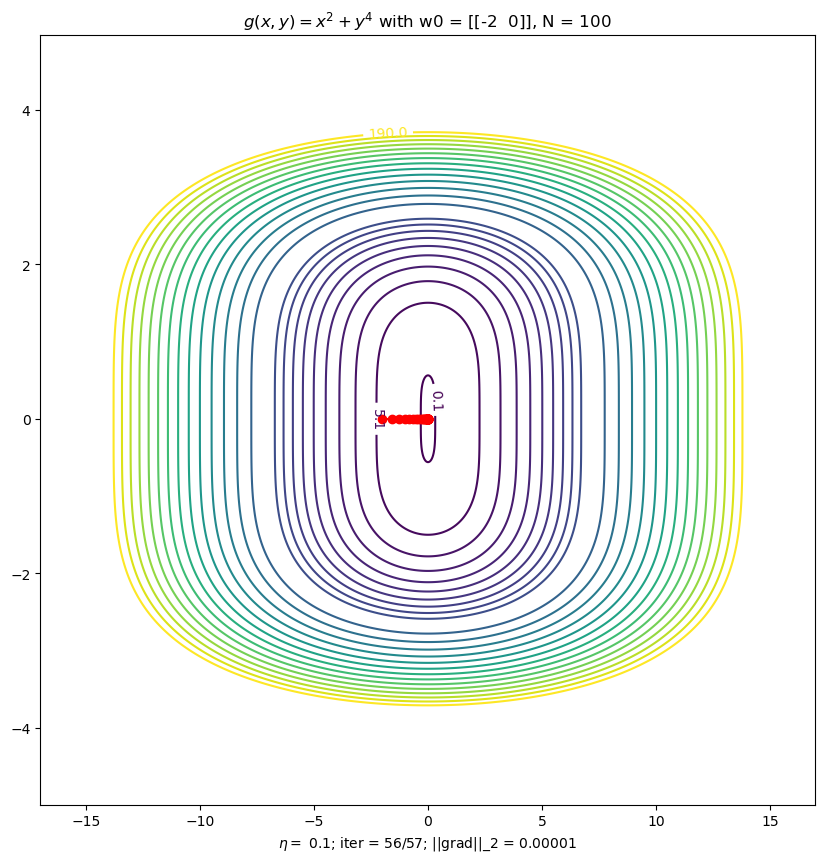

In [8]:
save_gif_4b(0.1)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
14


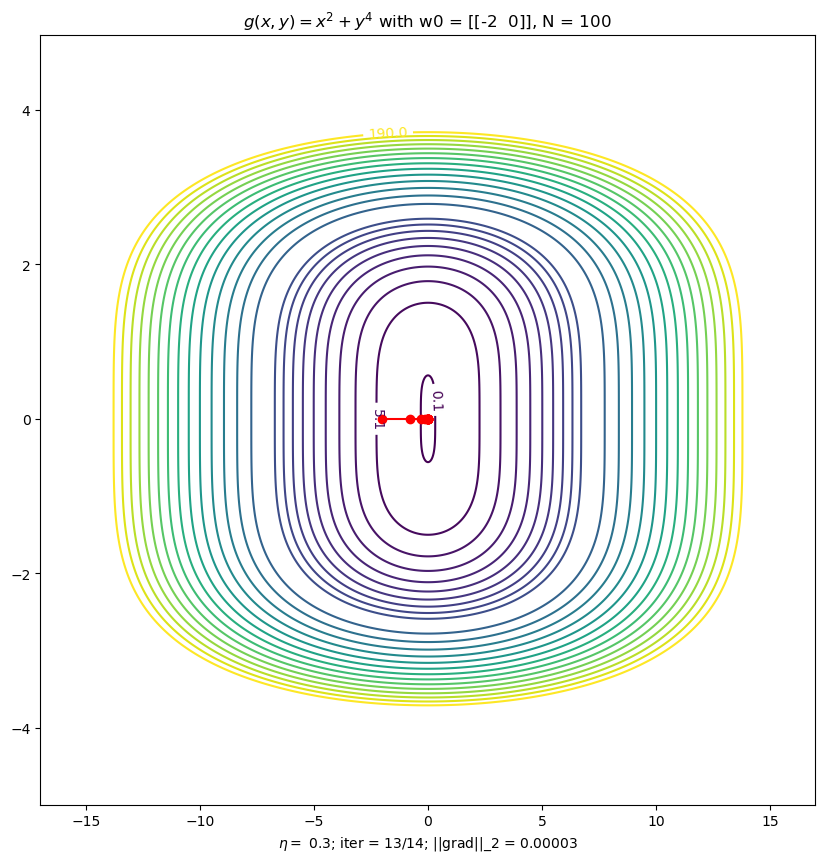

In [9]:
save_gif_4b(.3)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
8


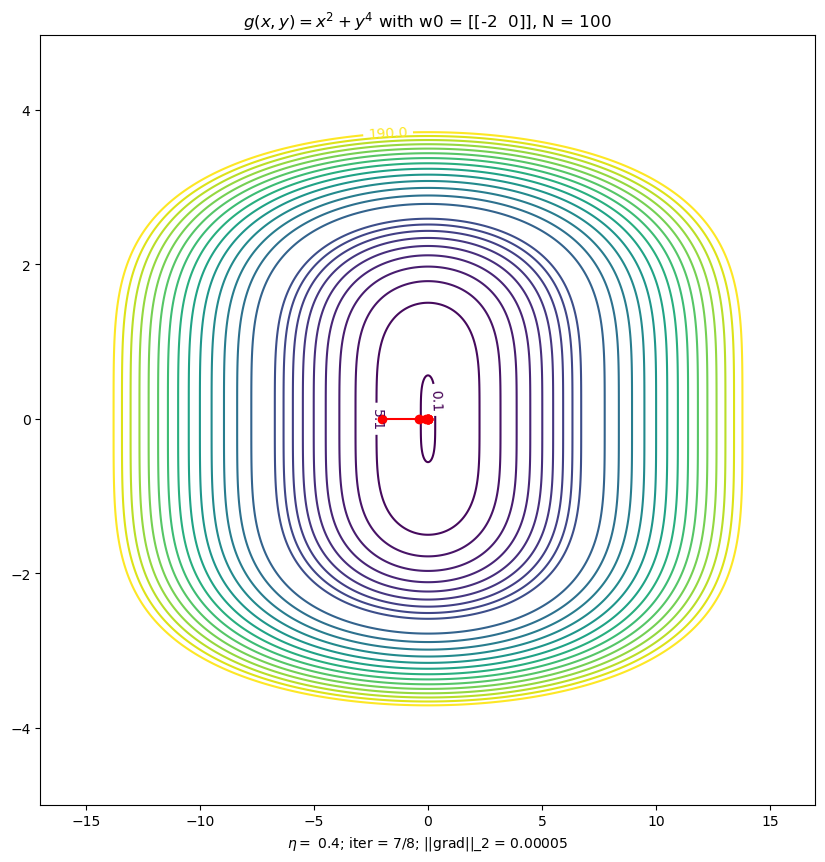

In [10]:
save_gif_4b(.4)
plt.show()

In [11]:
# 4c
def save_gif_4c(w_init):
    (w, it) = gradient_descent(learning_rate = 0.1, w0 = w_init, N = 100, eps = 1e-5)
    print(it)
    fig, ax = plt.subplots(figsize=(10,10))    
    plt.cla()
    plt.axis([-6, 5, -20, 15])
    x0 = np.linspace(0, 1, 2, endpoint=True)

    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(X, Y, Z, np.concatenate((np.arange(0.1, 50, 5), np.arange(60, 200, 10))))
            manual_locations = [(-4, 15), (-2, 0), ( 1, .25)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)

        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro') 
        xlabel = 'w_init = ' + str(w_init.T) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.5f' % np.linalg.norm(grad_function(w[ii]))
        plt.title(f'g(x,y) = $x^2 + y^4$ with $\eta = 0.1$, N = 100')
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img4c_' + str(w_init.T) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
99


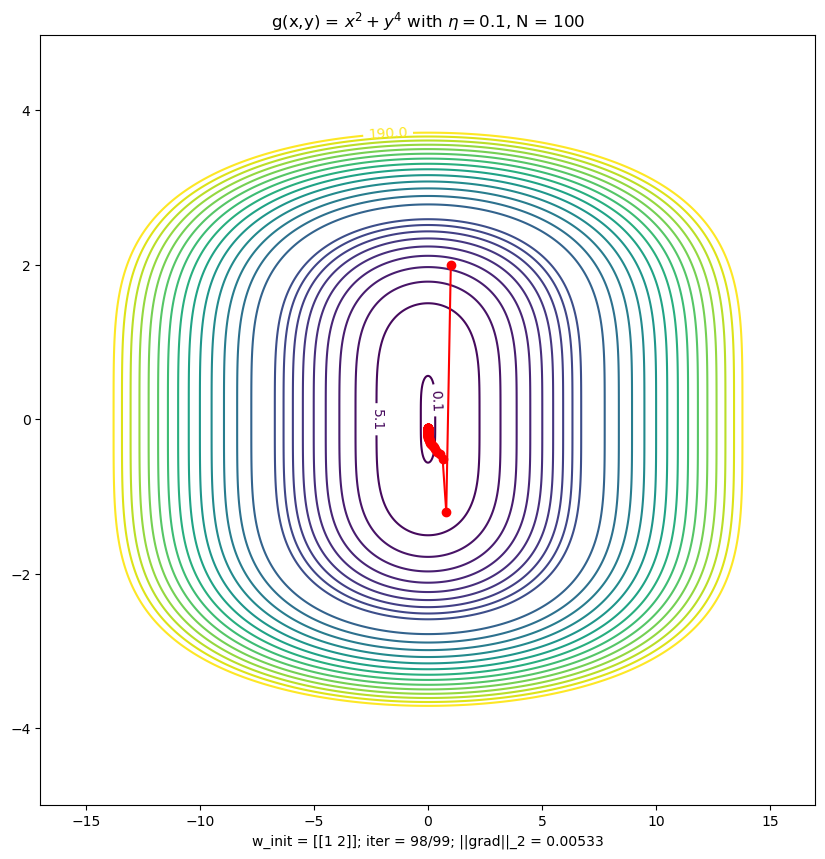

In [12]:
save_gif_4c(w_init = np.array([[1], [2]]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
99


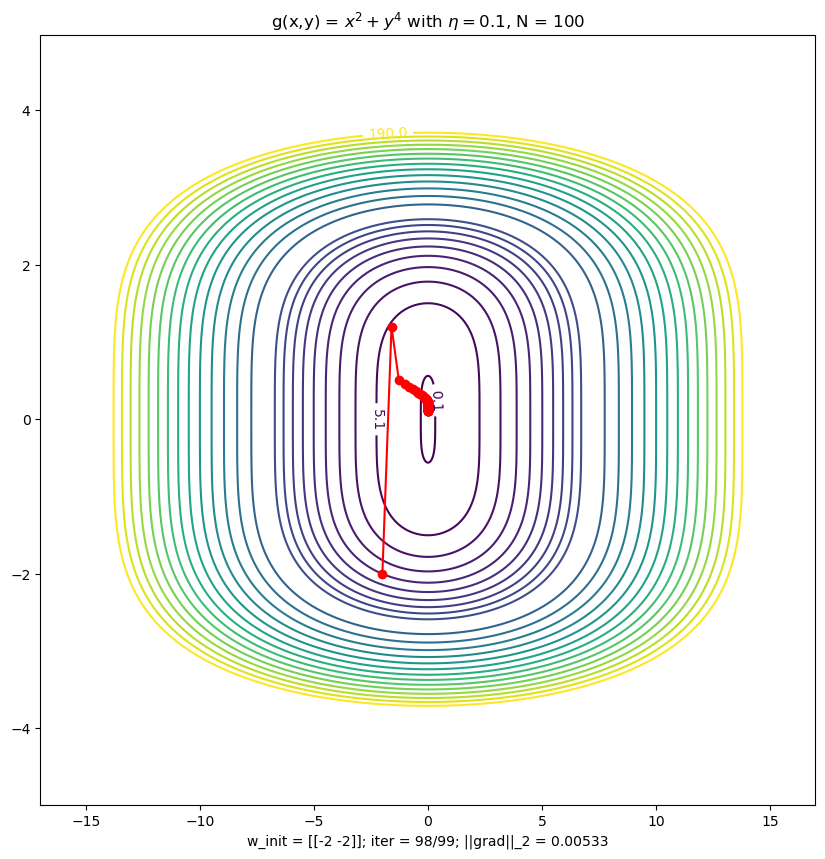

In [13]:
save_gif_4c(w_init = np.array([[-2], [-2]]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
99


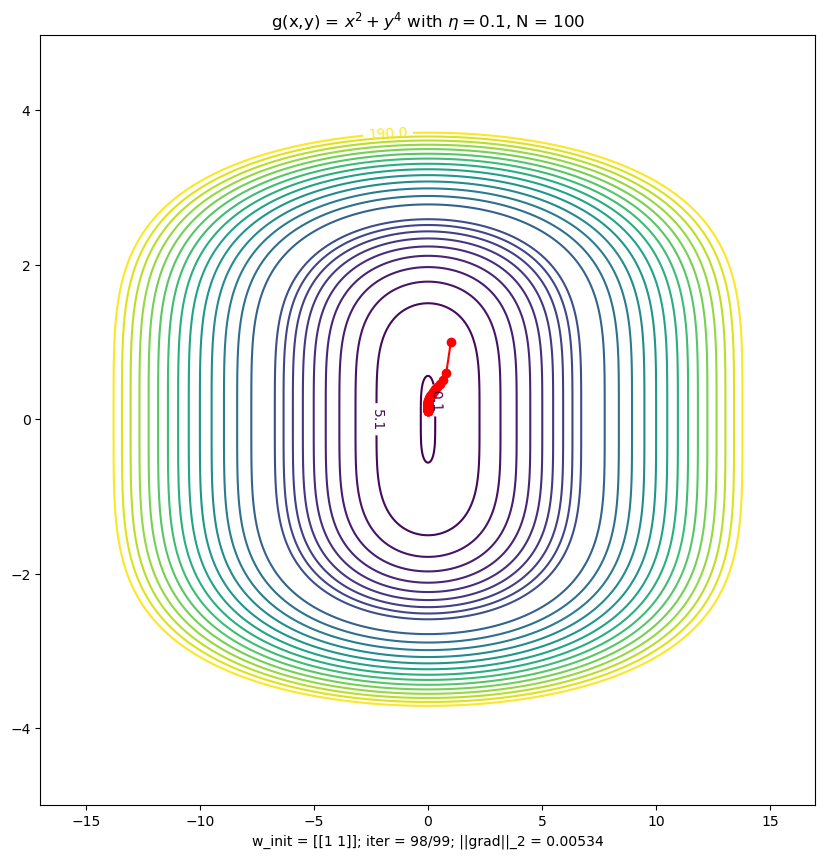

In [14]:
save_gif_4c(w_init = np.array([[1], [1]]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
57


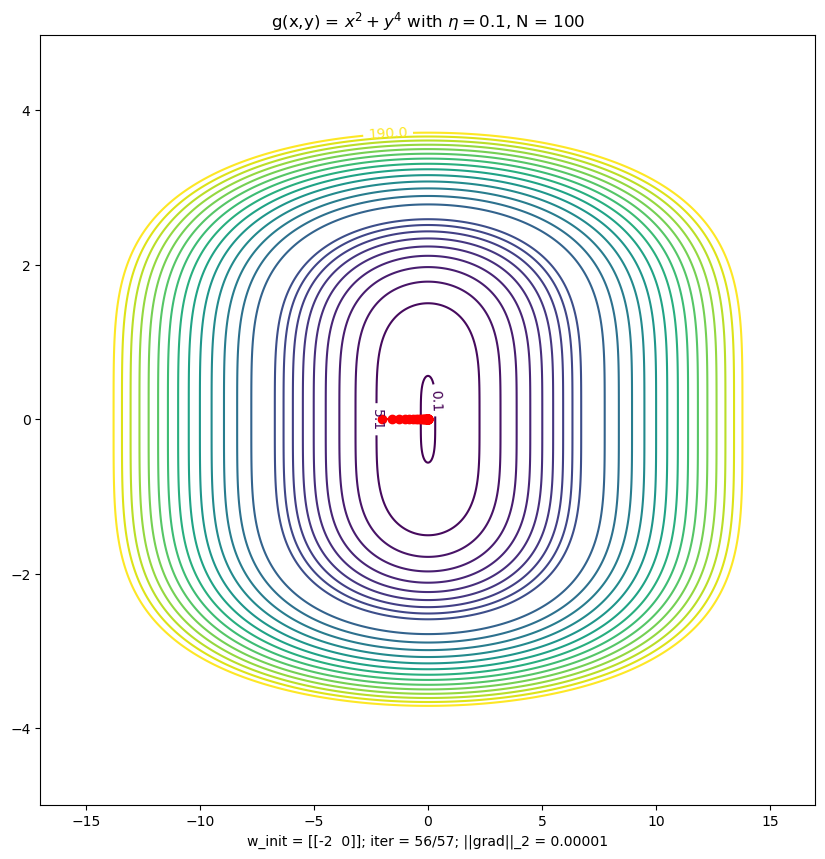

In [15]:
save_gif_4c(w_init = np.array([[-2], [0]]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
99


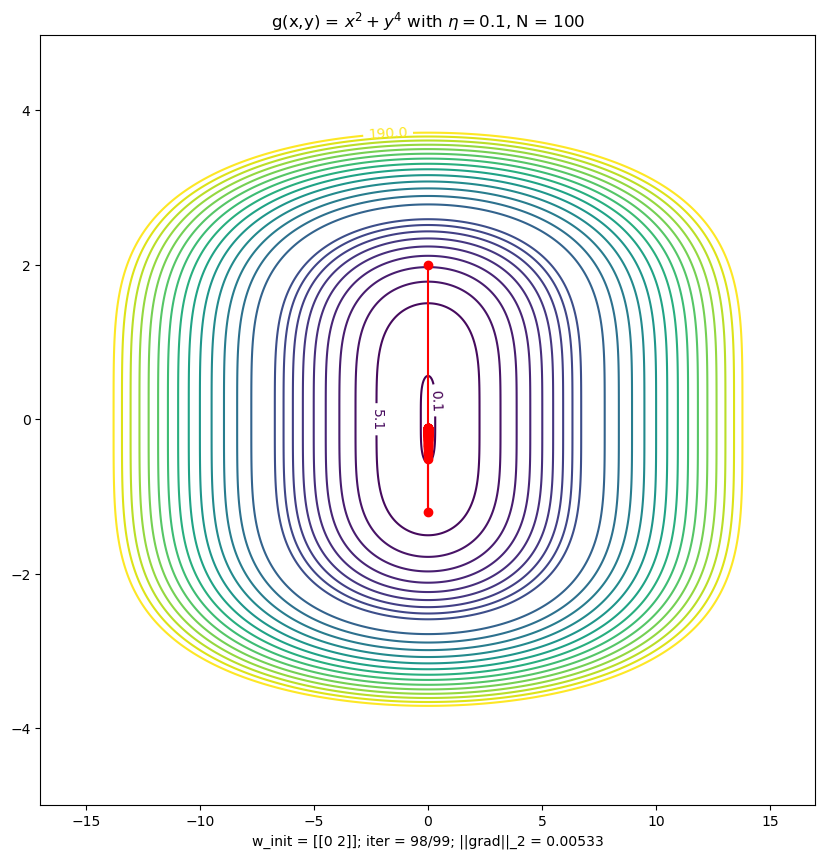

In [16]:
save_gif_4c(w_init = np.array([[0], [2]]))
plt.show()